# Multi-arm Bandit Problem

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt

10-armed testbed: set of 2000 randomly generated n-armed bandit tasks with n = 10 <br> <br>
For each bandit, the action values, q(a), a = 1, . . . , 10, were selected according to a normal (Gaussian) distribution with mean 0 and variance 1. <br> <br>
On t th time step with a given bandit, the actual reward R_t was the q(A_t) for the bandit (where A_t was the action selected) plus a normally distributed noise term that was mean 0 and variance 1.

In [2]:
def bandit_action_values(num_actions = 10):
    #number of actions: num_actions
    values = np.random.normal(0, 1, num_actions)
    return values

In [3]:
bandit_action_values(num_actions = 10)

array([ 1.07676775,  0.30979035,  1.27488621, -0.0329673 , -0.35801971,
       -0.34737752, -0.56508102,  1.59150327,  0.32562166,  0.06982709])

In [4]:
def bandit_reward_for_action(action):
    q = bandit_action_values(num_actions = 10)
    Q = q[action - 1] + np.random.normal(0, 1, 1)
    return Q

In [5]:
bandit_reward_for_action(action = 0)

array([0.76562539])

In [6]:
class Bandit:

    def __init__(self, num_actions):
        self.num_actions = num_actions
        self.values = self.bandit_action_values()

    def bandit_action_values(self):
        values = np.random.normal(0, 1, self.num_actions)
        return values

    def reward_for_action(self, action):

        try:
            Q = self.values[action] + np.random.normal(0, 1, 1)

        except:
            print("INVALID ACTION!")
            return

        return Q


In [7]:
bandit = Bandit(3)

In [8]:
bandit.num_actions

3

In [9]:
bandit.values

array([-0.56267967, -0.2788939 ,  0.35725589])

In [10]:
bandit.reward_for_action(action=1)

array([0.26698065])

In [11]:
def value_estimate(num_iter, action):
    sum = 0
    for i in range(0, num_iter):
        sum += bandit.reward_for_action(action=action)
    value_estimate =  sum / num_iter
    return value_estimate

In [12]:
value_estimate(num_iter = 1000, action = 0)

array([-0.59181955])

In [13]:
value_estimate(num_iter = 1000, action = 1)

array([-0.26325837])

In [14]:
value_estimate(num_iter = 1000, action = 2)

array([0.39935894])

In [15]:
class Player:

    def __init__(self, num_plays, Bandit, exploration_percent, start_iter):
        self.num_plays = num_plays
        self.Bandit = Bandit
        self.exploration_percent = exploration_percent
        self.value_estimates = np.zeros_like(self.Bandit.values).astype(np.float)
        self.num_action_selected = np.zeros_like(self.Bandit.values)
        self.action = None
        self.reward = 0
        self.start_iter =start_iter
        self.avg_reward = 0

    def update_action_value_estimates(self):
        value_estimates = self.value_estimates[self.action] + (self.reward - self.value_estimates[self.action])/self.num_action_selected[self.action]
        self.value_estimates[self.action] = value_estimates
        return

    def pull_bandit_lever_once(self):

        num = np.random.uniform(0,1)

        if num < self.exploration_percent:
            #Exploration ---> choose an action randomly without considering the value estimates
            self.action = np.random.randint(0, self.Bandit.num_actions)

        else:
            #Exploitation ---> Choose a greedy action arbitrarily
            if np.min(self.num_action_selected) < self.start_iter:
                action = np.where(self.num_action_selected == np.min(self.num_action_selected))[0]
                self.action = action[0]

            else:
                self.action = np.argmax(self.value_estimates, axis = 0)

        self.reward = self.Bandit.reward_for_action(action = self.action)[0]
        self.num_action_selected[self.action] += 1
        return 

    def play_game(self):

        for _ in range(0,self.num_plays):
            self.pull_bandit_lever_once()
            self.update_action_value_estimates()
            self.avg_reward += self.reward
        self.avg_reward = self.avg_reward/(self.num_plays+1)


In [16]:
player = Player(10000, bandit, 0.01, 0)
print("True value estimates: ", bandit.values)

True value estimates:  [-0.56267967 -0.2788939   0.35725589]


/tmp/ipykernel_13338/1450406212.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.value_estimates = np.zeros_like(self.Bandit.values).astype(np.float)


In [17]:
print("ONE GAME")

player.pull_bandit_lever_once()
print("Action selected: ", player.action )
print("Reward collected: ", player.reward)
player.update_action_value_estimates()
print("Updated value estimates: ", player.value_estimates)

ONE GAME
Action selected:  0
Reward collected:  -1.7073681167892336
Updated value estimates:  [-1.70736812  0.          0.        ]


In [18]:
player.play_game()

In [19]:
print("Updated value estimates: ", player.value_estimates)

Updated value estimates:  [-0.7902834  -0.2898168   0.35596788]


# Average Reward

In [20]:
def average_reward_plot(num_bandits = 2000, num_steps = 1000, epsilon = 0.01):

    plt.figure(figsize=(5,5))
    
    for eps in epsilon:
        avg_step_reward = []
        for step in range(0, num_steps):
            reward = []
            for _ in range(0,num_bandits):
                new_bandit = Bandit(10)
                new_player = Player(step, new_bandit, eps, 0)
                new_player.play_game()
                reward.append(new_player.avg_reward)
            avg_bandits_reward = np.sum(reward)/ num_bandits
            avg_step_reward.append(avg_bandits_reward)
        plt.plot(range(0,num_steps), avg_step_reward, label = "epsilon = "+str(eps))
        plt.legend()
    plt.savefig("average_reward_stationary.png", dpi = 300, bbox_inches = 'tight')

In [21]:
#average_reward_plot(num_bandits = 100, num_steps = 500, epsilon = [0, 0.01, 0.1])

/tmp/ipykernel_13338/1450406212.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.value_estimates = np.zeros_like(self.Bandit.values).astype(np.float)


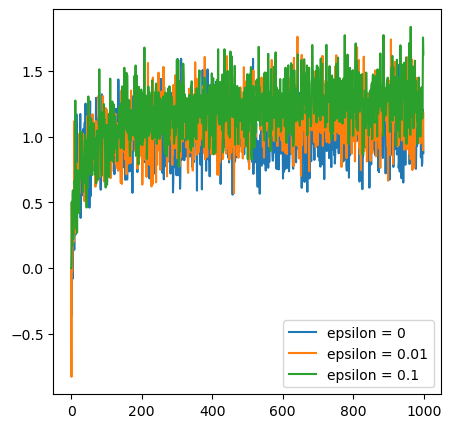

In [22]:
average_reward_plot(num_bandits = 10, num_steps = 1000, epsilon = [0, 0.01, 0.1])

# Tracking a Nonstationary Problem

In [23]:
class non_stationary_bandit(Bandit):

    def __init__(self):
        super().__init__(10)

    def update_bandit_action_values(self):
        rand = np.random.randint(1,2)
        self.values = self.values + np.random.normal(0, rand, self.num_actions)
        return 

    def reward_for_action(self, action):

        num = np.random.uniform(0, 1)

        if num < 0.1:
            self.update_bandit_action_values()

        try:
            Q = self.values[action] + np.random.normal(0, 1, 1)

        except:
            print("INVALID ACTION!")
            return

        return Q

In [24]:
bandit = non_stationary_bandit()

In [25]:
bandit.reward_for_action(0)
bandit.values

array([ 0.54813708, -0.17552636,  0.17156045, -1.05261646,  0.15024671,
       -0.15139692, -0.91935628, -0.09697608,  0.82838342, -1.33025335])

In [26]:
def weights(alpha, k):
    return (1-alpha)**k, alpha

In [27]:
weights(alpha = 0.5, k = 1)

(0.5, 0.5)

In [28]:
weights(alpha = 0.5, k = 50)

(8.881784197001252e-16, 0.5)

In [29]:
weights(alpha = 0.5, k = 100)

(7.888609052210118e-31, 0.5)

In [30]:
weights(alpha = 0, k = 1)

(1, 0)

In [31]:
weights(alpha = 0, k = 100)

(1, 0)

In [32]:
weights(alpha = 1, k = 1)

(0, 1)

In [33]:
weights(alpha = 1, k = 100)

(0, 1)

In [34]:
class Player_recency_weighted_update(Player):

    def __init__(self, num_plays, Bandit, exploration_percent, start_iter, alpha):
        super().__init__(num_plays, Bandit, exploration_percent, start_iter)
        self.alpha = alpha

    def update_action_value_estimates(self):
        value_estimates = self.value_estimates[self.action] + (self.reward - self.value_estimates[self.action])*self.alpha
        self.value_estimates[self.action] = value_estimates
        return

In [35]:
bandit = non_stationary_bandit()
player_1 = Player_recency_weighted_update(10000, bandit, 0.01, 0, 0.5)

/tmp/ipykernel_13338/1450406212.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.value_estimates = np.zeros_like(self.Bandit.values).astype(np.float)


In [36]:
bandit.values

array([-1.06315976,  0.5523289 , -0.7646316 ,  0.24246004, -0.50858153,
       -0.1330467 ,  0.90120671,  0.52982305, -1.02108601, -0.79567964])

In [37]:
player_1.play_game()

In [38]:
np.linalg.norm(player_1.value_estimates - bandit.values)

19.773930549317974

In [39]:
bandit = non_stationary_bandit()
player_2 = Player(10000, bandit, 0.01, 0)

/tmp/ipykernel_13338/1450406212.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.value_estimates = np.zeros_like(self.Bandit.values).astype(np.float)


In [40]:
player_2.play_game()

In [41]:
np.linalg.norm(player_2.value_estimates - bandit.values)

72.11243571710442

# Optimistic Initial Values

In [42]:
class Player_optimistic(Player):

    def __init__(self, num_plays, Bandit, exploration_percent, start_iter):
        super().__init__(num_plays, Bandit, exploration_percent, start_iter)
        self.value_estimates = np.ones_like(self.Bandit.values).astype(np.float)*5


In [43]:
bandit = Bandit(10)
player = Player_optimistic(10000, bandit, 0.01, 0)

/tmp/ipykernel_13338/1450406212.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.value_estimates = np.zeros_like(self.Bandit.values).astype(np.float)
/tmp/ipykernel_13338/1758828246.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.value_estimates = np.ones_like(self.Bandit.values).astype(np.float)*5


In [44]:
player.value_estimates

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.])